In [14]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

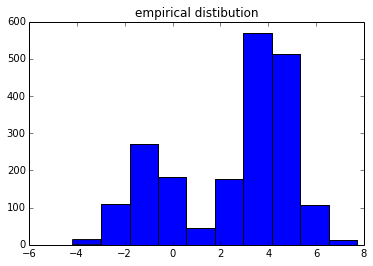

In [59]:
a = np.random.normal(-1,1.0,600)
b = np.random.normal(4,1.0,1400)
data = np.concatenate([a,b])
plt.hist(data)
plt.title("empirical distibution")
plt.show()

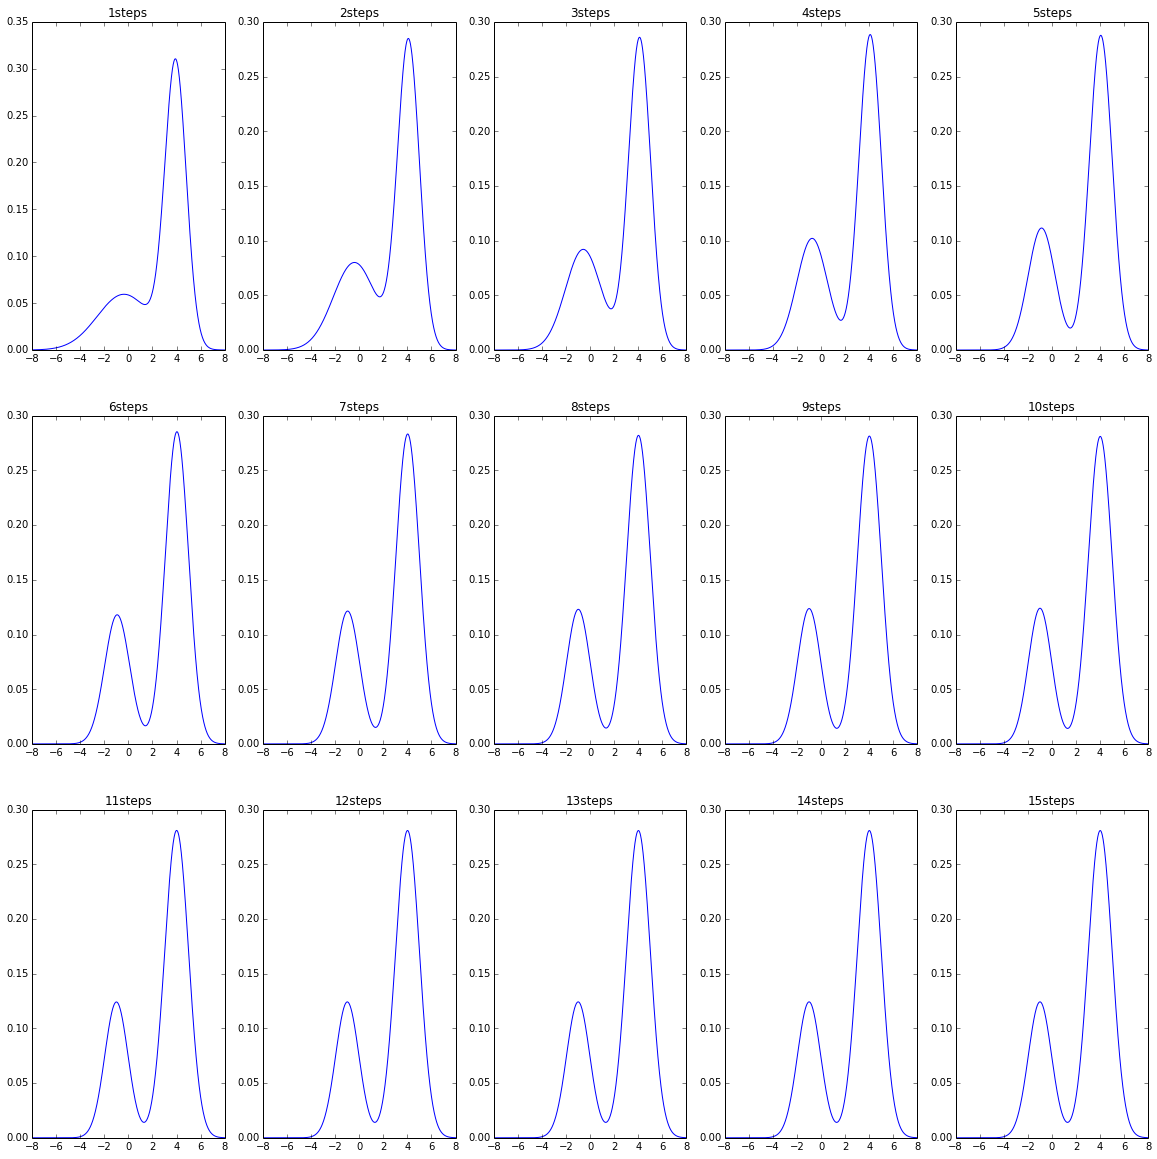

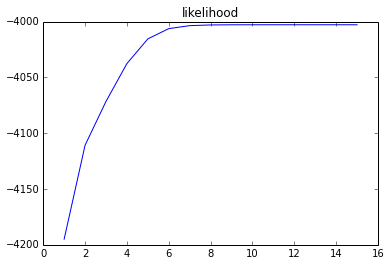

In [89]:
mu1 = -4.0
mu2 = 3.0
mu = np.array([mu1,mu2])
var1 = 1.4
var2 = 0.4
var_list = np.array([var1,var2])
pi = np.array([0.8,0.2])
gamma = np.zeros([len(data),2])
sumsum=[0,0]
likelihood_list = []
N = 15
##### function for calulateing likelihood function
def calulate_likelihood(data,pi,var_list,mu):
    sum_list = []
    for i in range(len(data)):
        aux_list=[]
        for k in range(2):
            aux_list.append(pi[k]*st.norm.pdf(data[i],mu[k],var_list[k]))
        hey = np.log(np.sum(np.array(aux_list)))
        sum_list.append(hey)
    return np.sum(np.array(sum_list))

#### E-step
plt.figure(figsize=(20,20))
for zzz in range(N):
    ###var_list=[1,1]
    for i in range(len(data)):
        hoge1 = pi[0]*st.norm.pdf(data[i],mu[0],var_list[0])
        hoge2 = pi[1]*st.norm.pdf(data[i],mu[1],var_list[1])
        gamma[i,0] =  hoge1*1.0/(hoge1+hoge2)
        gamma[i,1] =  hoge2*1.0/(hoge1+hoge2)

    #### M-step
    for i in range(len(mu)):
        ##### update pi
        sumsum[i] = np.sum(gamma[:,i])
        pi[i] = sumsum[i]*1.0/len(data)
        ##### update mean 
        mu[i] = np.dot(np.transpose(gamma[:,i]),data)*1.0/sumsum[i]
        ###### update variance
        var_list[i]= np.power(np.sum(np.array([gamma[k,i]*np.power(data[k]-mu[i],2) for k in range(len(data))] ))*1.0/sumsum[i],0.5)
    ###### output
    #print str(zzz)+"steps "+" mu="+str(mu)
    #print str(zzz)+"steps "+" pi="+str(pi)
    #print str(zzz)+"steps "+" var="+str(var_list)
    #print likelihood
    likelihood = calulate_likelihood(data,pi,var_list,mu)
    likelihood_list.append(likelihood)
    plt.subplot(3,5,zzz+1)
    xxx = np.linspace(-8,8,1000)
    yyy = [pi[0]*st.norm.pdf(i,mu[0],var_list[0])+pi[1]*st.norm.pdf(i,mu[1],var_list[1]) for i in xxx]
    plt.title(str(zzz+1)+"steps")
    plt.plot(xxx,yyy)
plt.show()

xxx = [i+1 for i in range(N)]
plt.title("likelihood")
plt.plot(xxx,likelihood_list)
plt.show()